In [1]:
import os
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import xarray as xr
from dateutil.relativedelta import relativedelta

In [6]:
expt_name = 'DAv7_M36_ASCAT_type_13_comb_fp_scaled' #'LS_DAv8_M36'

start_date = datetime(2015, 4, 1)
end_date = datetime(2021, 4, 1)

start_date_str = start_date.strftime('%Y%m%d')
end_date_str = end_date.strftime('%Y%m%d')

In [7]:
data = np.load(f'../outputs/{expt_name}_{start_date_str}_{end_date_str}_increments_concat.npz')
sfmc_increment_concat = data['sfmc_increment_concat']
#rzmc_increment_concat = data['rzmc_increment_concat']
#prmc_increment_concat = data['prmc_increment_concat']

In [8]:
%%time
# Define the thresholds and their corresponding labels
thresholds = [0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005]
labels = [f'Threshold: {threshold}\n Number of surface SM increments' for threshold in thresholds]

# Initialize dictionaries to store results
incremented_values = {}
cnt_sfmc_increment = {}
mean_sfmc_increment = {}
std_sfmc_increment = {}

# Perform calculations for each threshold
for threshold in thresholds:
    key = f'{threshold:.5f}'.split('.')[1].rstrip('0')  # Extract the fractional part and remove trailing zeros
    incremented_values[key] = (sfmc_increment_concat < -threshold) | (sfmc_increment_concat > threshold)
    cnt_sfmc_increment[key] = np.sum(incremented_values[key], axis=0)
    mean_sfmc_increment[key] = np.nanmean(np.where(incremented_values[key], sfmc_increment_concat, np.nan), axis=0)
    std_sfmc_increment[key] = np.nanstd(np.where(incremented_values[key], sfmc_increment_concat, np.nan), axis=0)

# Define the output file name
output_file = f'{expt_name}_{start_date_str}_{end_date_str}_incr_stats_test.npz'

# Remove the existing file if it exists
if os.path.exists(output_file):
    os.remove(output_file)

# Save the data to a file
try:
    np.savez(output_file,
             **{f'incremented_values_{key}': incremented_values[key] for key in incremented_values},
             **{f'cnt_sfmc_increment_{key}': cnt_sfmc_increment[key] for key in cnt_sfmc_increment},
             **{f'mean_sfmc_increment_{key}': mean_sfmc_increment[key] for key in mean_sfmc_increment},
             **{f'std_sfmc_increment_{key}': std_sfmc_increment[key] for key in std_sfmc_increment})
    print(f"Data successfully saved to {output_file}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

<timed exec>:16: RuntimeWarning: Mean of empty slice


Data successfully saved to DAv7_M36_ASCAT_type_13_comb_fp_scaled_20150401_20210401_incr_stats_test.npz
CPU times: user 5min 32s, sys: 1min 17s, total: 6min 50s
Wall time: 7min


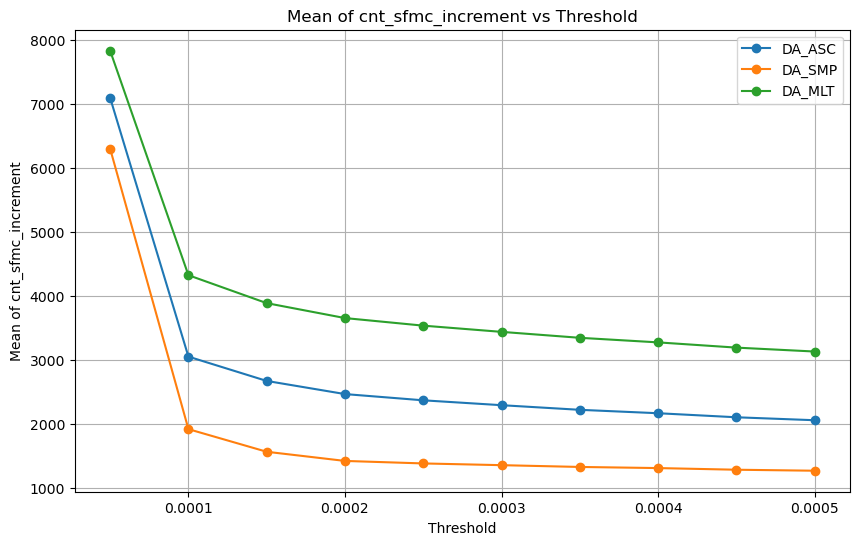

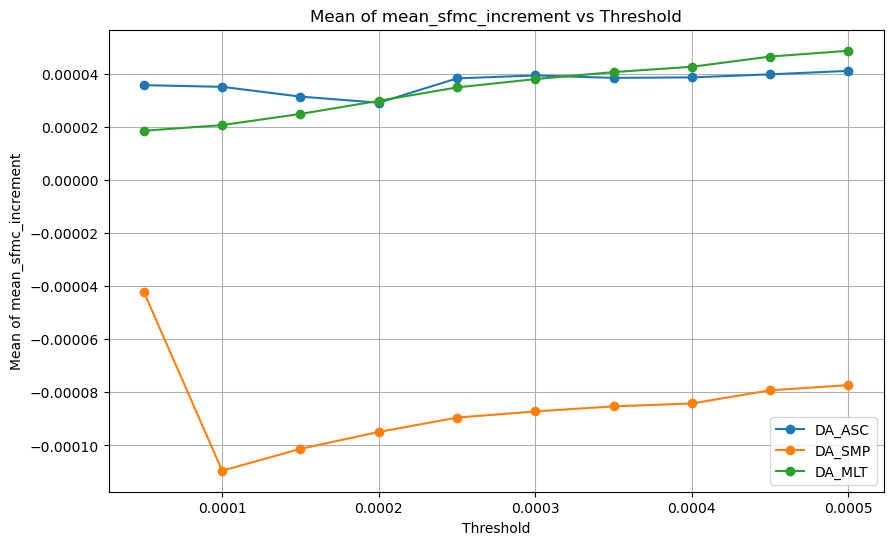

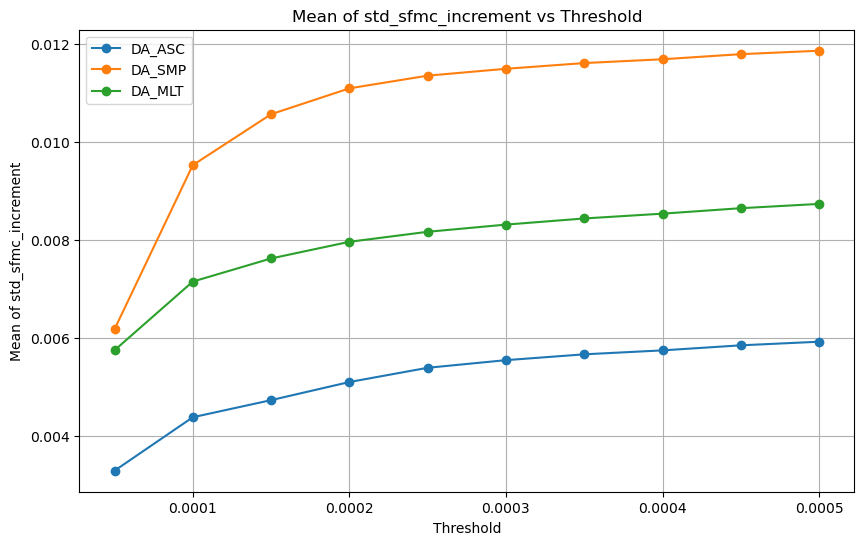

In [10]:
# Define the experiment names
experiment_names = {
    'DAv7_M36_ASCAT_type_13_comb_fp_scaled': 'DA_ASC',
    'DAv7_M36_SMAP_type_13_comb_fp_scaled': 'DA_SMP',
    'DAv7_M36_MULTI_type_13_comb_fp_scaled': 'DA_MLT'
}

# Define the thresholds and their corresponding labels
thresholds = [0.00005, 0.0001, 0.00015, 0.0002, 0.00025, 0.0003, 0.00035, 0.0004, 0.00045, 0.0005]
labels = [f'Threshold: {threshold}\n Number of surface SM increments' for threshold in thresholds]

# Initialize dictionaries to store the mean values for each experiment
mean_cnt_sfmc_increment = {expt_name: [] for expt_name in experiment_names}
mean_mean_sfmc_increment = {expt_name: [] for expt_name in experiment_names}
mean_std_sfmc_increment = {expt_name: [] for expt_name in experiment_names}

# Loop through each experiment to load the data and calculate the mean values
for expt_name in experiment_names:
    # Define the output file name
    output_file = f'{expt_name}_{start_date_str}_{end_date_str}_incr_stats_test.npz'
    
    # Load the data from the .npz file
    data = np.load(output_file)
    
    # Calculate the mean of cnt_sfmc_increment for each threshold
    mean_cnt_sfmc_increment[expt_name] = [np.nanmean(data[f'cnt_sfmc_increment_{f"{threshold:.5f}".split(".")[1].rstrip("0")}']) for threshold in thresholds]
    mean_mean_sfmc_increment[expt_name] = [np.nanmean(data[f'mean_sfmc_increment_{f"{threshold:.5f}".split(".")[1].rstrip("0")}']) for threshold in thresholds]
    mean_std_sfmc_increment[expt_name] = [np.nanmean(data[f'std_sfmc_increment_{f"{threshold:.5f}".split(".")[1].rstrip("0")}']) for threshold in thresholds]

# Plot the mean of cnt_sfmc_increment against the threshold values
plt.figure(figsize=(10, 6))
for expt_name, short_name in experiment_names.items():
    plt.plot(thresholds, mean_cnt_sfmc_increment[expt_name], marker='o', label=short_name)
plt.xlabel('Threshold')
plt.ylabel('Mean of cnt_sfmc_increment')
plt.title('Mean of cnt_sfmc_increment vs Threshold')
plt.legend()
plt.grid(True)
plt.savefig('mean_cnt_sfmc_increment_vs_threshold.png')
plt.show()

# Plot the mean of mean_sfmc_increment against the threshold values
plt.figure(figsize=(10, 6))
for expt_name, short_name in experiment_names.items():
    plt.plot(thresholds, mean_mean_sfmc_increment[expt_name], marker='o', label=short_name)
plt.xlabel('Threshold')
plt.ylabel('Mean of mean_sfmc_increment')
plt.title('Mean of mean_sfmc_increment vs Threshold')
plt.legend()
plt.grid(True)
plt.savefig('mean_mean_sfmc_increment_vs_threshold.png')
plt.show()

# Plot the mean of std_sfmc_increment against the threshold values
plt.figure(figsize=(10, 6))
for expt_name, short_name in experiment_names.items():
    plt.plot(thresholds, mean_std_sfmc_increment[expt_name], marker='o', label=short_name)
plt.xlabel('Threshold')
plt.ylabel('Mean of std_sfmc_increment')
plt.title('Mean of std_sfmc_increment vs Threshold')
plt.legend()
plt.grid(True)
plt.savefig('mean_std_sfmc_increment_vs_threshold.png')
plt.show()